In [1]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image, ImageDraw

In [2]:
import ujson as json

In [3]:
from binary_file_parser import *

In [4]:
from utils import *

In [5]:
great_wall_path = "/Users/lindahuang/Documents/CS_Git_Coursework/Let-s-Doodle/classifiers/data/full_binary_The Great Wall of China.bin"

In [6]:
great_wall_np = f'./data/full_numpy_bitmap_The Great Wall of China.npy'

In [7]:
all_imgs = np.load(great_wall_np)

In [26]:
all_imgs_lst = [one_img]

In [11]:
drawings = unpack_drawings(great_wall_path)

In [30]:
lst = []

In [31]:
count = 0
for drawing in unpack_drawings(great_wall_path):
    # do something with the drawing
    print(drawing['country_code'])
    print(drawing['image'])
    print(np.hstack(drawing['image']).max(axis=1))
    lst.append(drawing['image'])
    count += 1
    if count == 5:
        break

b'US'
[((10, 41, 126, 153, 195, 219, 241), (49, 42, 47, 35, 8, 0, 0)), ((244, 244, 255), (0, 38, 89)), ((0, 10, 11), (61, 94, 115))]
[255 115]
b'US'
[((0, 88, 115, 146, 156, 164, 173, 184, 216, 239, 250, 252), (33, 39, 30, 8, 7, 7, 15, 31, 18, 1, 1, 8)), ((255, 237, 178, 152, 121, 81), (31, 32, 63, 51, 64, 70))]
[255  70]
b'US'
[((5, 0, 8, 22, 44, 73, 104, 130, 152, 164, 166, 158), (139, 37, 12, 0, 0, 14, 42, 81, 126, 174, 217, 255))]
[166 255]
b'SA'
[((1, 1, 6, 16, 43, 89, 106, 120, 133, 217, 250), (146, 126, 117, 109, 101, 96, 83, 60, 49, 19, 0)), ((12, 34, 46, 59, 92, 119, 136, 163, 219, 241, 255), (195, 160, 149, 143, 147, 138, 119, 78, 57, 33, 22)), ((40, 37, 41, 65, 81, 95, 104, 108, 116, 121, 134, 142, 151, 162, 174, 182, 205, 213, 235, 254), (237, 214, 205, 226, 194, 210, 212, 208, 182, 175, 201, 208, 200, 178, 171, 174, 193, 194, 163, 151)), ((43, 50, 70, 97, 153, 202, 209, 228, 251), (186, 174, 163, 158, 161, 134, 136, 148, 123)), ((9, 15, 22, 30, 60, 78, 93, 119), (97, 73, 6

In [32]:
raster_imgs = vector_to_raster(lst)

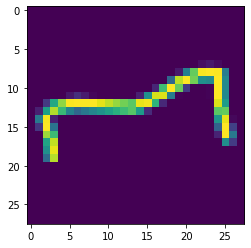

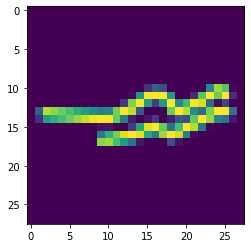

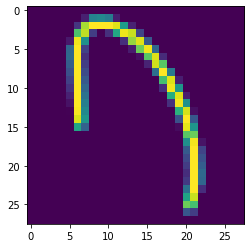

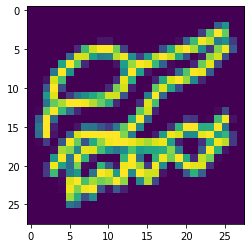

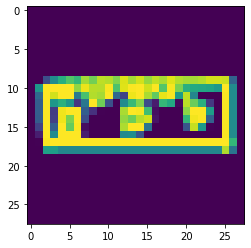

In [36]:
for img in raster_imgs:
    plt.imshow(img.reshape([28,28]))
    plt.show()

In [8]:
def open_ndjson(path: str) -> pd.DataFrame:
    """
    Pass in input filepath to ndjson, return pandas DataFrame.
    """
    records = map(json.loads, open(path, encoding="utf8"))
    return pd.DataFrame.from_records(records)

In [10]:
class QuickDrawDataset(Dataset):
    """QuickDraw Dataset, data sourced from Google."""
    
    def __init__(self, ndjson_file, transform=None):
        """
        Args:
            ndjson_file (string): Path to the ndsjon file with sketch information.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.sketches = open_ndjson(ndjson_file)
        self.transform = transform
        self.LABEL_IDX = 0
        self.IMG_IDX = 5

    def __len__(self):
        return len(self.sketches)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        img = self.sketches.iloc[idx, self.IMG_IDX]
        label = self.sketches.iloc[idx, self.LABEL_IDX]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'img': img, 'label': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

,word,countrycode,timestamp,recognized,key_id,drawing
0,The Great Wall of China,US,2017-03-28 17:17:29.7274 UTC,True,4626156441567232,"[[[10, 41, 126, 153, 195, 219, 241], [49, 42, ..."
1,The Great Wall of China,US,2017-03-09 15:36:08.5549 UTC,True,6023940847697920,"[[[0, 88, 115, 146, 156, 164, 173, 184, 216, 2..."
2,The Great Wall of China,US,2017-03-15 16:38:08.73111 UTC,False,6159862251651072,"[[[5, 0, 8, 22, 44, 73, 104, 130, 152, 164, 16..."
3,The Great Wall of China,SA,2017-03-22 16:20:57.32064 UTC,True,5144913899421696,"[[[1, 1, 6, 16, 43, 89, 106, 120, 133, 217, 25..."
4,The Great Wall of China,RO,2017-03-01 22:11:57.65725 UTC,True,4637367665164288,"[[[2, 2, 6], [8, 52, 87]], [[0, 53, 255, 255],..."
...,...,...,...,...,...,...
193010,The Great Wall of China,TH,2017-03-15 06:28:28.45724 UTC,True,6666673492852736,"[[[0, 5, 3, 10], [2, 28, 101, 120]], [[3, 15, ..."
193011,The Great Wall of China,NO,2017-01-23 12:27:00.39448 UTC,True,4892208882778112,"[[[8, 10, 21, 49, 225], [0, 6, 12, 16, 5]], [[..."
193012,The Great Wall of China,RO,2017-03-20 00:49:46.79279 UTC,True,4577043926745088,"[[[198, 190, 185, 178, 147, 126, 94, 82, 73, 6..."
193013,The Great Wall of China,US,2017-01-30 19:44:48.34066 UTC,True,6378003191824384,"[[[0, 53, 204], [36, 15, 2]], [[204, 242, 255]..."
